In [ ]:
import numpy as np
import numpy.random as npr 
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
from scipy.optimize import root
from scipy.optimize import optimize

Defintion of global variables: 


In [ ]:
sigma = 0.2
S0 = 1 
r = 0.02 
T = 5 
K = 1
Sample_size = 10000
T = 5
T1 = 3
T2 = 5

Box Muller

In [ ]:
def Box_muller(Sample_size):
    U = np.random.random(Sample_size)
    V = np.random.random(Sample_size)
    X=np.sqrt((-2*np.log(U)))*np.cos(2*np.pi*V)
    return np.array([list(X)])

Fonction répartition de la loi normale

In [ ]:
def F(x) : 
    b0 = 0.2316419
    b1 = 0.319381530
    b2 = -0.356563782
    b3 = 1.781477937 
    b4 = -1.821255978
    b5 = 1.330274429
    t = 1./(1+b0*x)
    return 1 - 1./np.sqrt(2*np.pi)*np.exp(-0.5*x**2)*(b1*t+b2*t**2+b3*t**3+b4*t**4 + b5*t**5)


Simulation de $W(T)$ et implémentation du calcul de $P_1$ par une méthode de Monte Carlo classique


In [ ]:
#%% Q3
def WT(T,Sample_size) : 
    G = Box_muller(Sample_size)
    W_T = G *np.sqrt(T) 
    return W_T

In [ ]:
#%% Q4 : implementation of bermuda 1 
def Put_MC_1(r,S0,sigma,T,K,Sample_size):
    W_T =WT(T,Sample_size)
    S=S0*np.exp((r-sigma**2/2)*T+sigma*W_T)  # WT=np.sqrt(T)*G
    
    payoff=np.exp(-r*T)*np.maximum(K-S,0) #put function

    MC_price=np.mean(payoff)

    STD=np.std(payoff) # standard deviation estimator

    error=1.65*STD/np.sqrt(Sample_size)

    CI_up=MC_price + error
    CI_down=MC_price -error
      
    # True price by Balck-Scholes formula 

    d1= 1./(sigma*np.sqrt(T))*(np.log(K/S0)-(r-sigma**2/2)*T)
    d2= d1 - sigma*np.sqrt(T)
    True_price= K*np.exp(-r*T)*F(d1) - S0*F(d2) 
         
    return MC_price, True_price, CI_up, CI_down, error
#with variance reduction
def Put_MC_VR_1(r,S0,sigma,T,K,Sample_size):
    W_T =WT(T,Sample_size)

    S=S0*np.exp((r-sigma**2/2)*T+sigma*W_T) 
    Sa=S0*np.exp((r-sigma**2/2)*T-sigma*W_T) 
     
    payoff=np.exp(-r*T)*np.maximum(K-S,0) #call function
    
    payoffa=0.5*( np.exp(-r*T)*np.maximum(K-S,0)+ np.exp(-r*T)*np.maximum(K-Sa,0))
    

    MC_price=np.mean(payoff)
    MCa_price=np.mean(payoffa)
    
    STDV=np.std(payoff) # standard deviation estimator
    STVA=np.std(payoffa)

    error=1.65*STDV/np.sqrt(Sample_size)
    errora= 1.65*STVA/np.sqrt(Sample_size)

    return MC_price,MCa_price,error,errora

print(Put_MC_1(r,S0,sigma,T,K,Sample_size))

(0.1264065947127959, 0.12509229580335668, 0.1291670397623807, 0.1236461496632111, 0.002760445049584799)


Intervalle de confiance à 90% et évolution de l'estimateur de $P_1$ par rapport au nombre de trajectoires

Monte Carlo Put Price 0.12514302310619163
True Put Price 0.12509229580335668
Confidence Interval up 0.1260213370878634
Confidence Interval down 0.12426470912451985
error 0.0008783139816717745


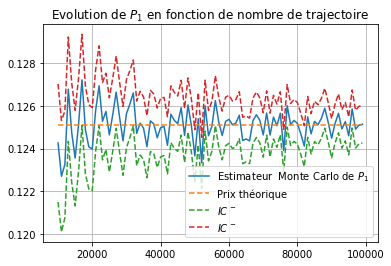

In [ ]:
#%% Q5 : confidence interval 
n = 100000
array= range(10000,n,1000)
taille= len(array)
MC_prices =np.zeros(taille)
True_prices = np.zeros(taille)
CI_downs = np.zeros(taille)
CI_ups = np.zeros(taille)
k=0
for i in array :  
    [MC_price, True_price,CI_up, CI_down,error]=Put_MC_1(r,S0,sigma,T,K,i) 
    
    MC_prices[k] = MC_price
    True_prices[k] = True_price  
    CI_ups [k] = CI_up
    CI_downs [k] = CI_down
    k+=1
[MC_price_VR,MCa_price_VR,error_VR,errora_VR] = Put_MC_VR_1(r,S0,sigma,T,K,Sample_size)
    
print("Monte Carlo Put Price", MC_price)
print("True Put Price", True_price)
print("Confidence Interval up", CI_up)
print("Confidence Interval down", CI_down)
print("error", error)


plt.plot(array,MC_prices,'-',label ='Estimateur  Monte Carlo de $P_1$')
plt.plot(array,True_prices,'--', label = 'Prix théorique')
plt.plot(array,CI_downs,'--',label="$IC^-$")
plt.plot(array,CI_ups,'--',label="$IC^-$")
plt.grid()
plt.title("Evolution de $P_1$ en fonction de nombre de trajectoire")
plt.legend()
plt.show()

Calcul numérique de $\bar{K}$

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([8.63353833e-12])
       r: array([0.31010557])
  status: 1
 success: True
       x: array([0.80238618])


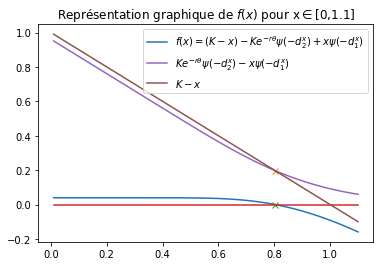

In [ ]:
#%% f Q7
T1 = 3
T2 = 5
sigma = 0.2
K = 1

def f(x) : 
    d1= 1./(sigma*np.sqrt(T2-T1))*(np.log(x/K)+(r+sigma**2/2)*(T2-T1))
    d2= d1 - sigma*np.sqrt(T2-T1)
    y = K - x - K*np.exp(-r*(T2-T1))*F(-d2)+x*F(-d1)
    return y
def f1(x) :
    d1= 1./(sigma*np.sqrt(T2-T1))*(np.log(x/K)+(r+sigma**2/2)*(T2-T1))
    d2= d1 - sigma*np.sqrt(T2-T1)
    y= K*np.exp(-r*(T2-T1))*F(-d2) - x*F(-d1)
    return y
def f2(x) : 
    return K-x

    
initial_guess = 1
solution = root(fun=f, x0=initial_guess) 
print(solution)

x= np.linspace(0.01,1.1,100)
plt.plot(x,f(x),label='$f(x) = (K-x) -Ke^{-r \\theta} \psi(-d_2^x) + x\psi(-d_1^x)$')
# plt.plot(0.80238639,f(0.80238639),'x')
plt.plot(0.80238618,f2(0.80238618),'x')
plt.plot(0.80238618,f(0.80238618),'x')

plt.plot(x,np.zeros(100),'-')
plt.plot(x,f1(x),label="$ Ke^{-r \\theta} \psi(-d_2^x) - x\psi(-d_1^x)$")
plt.plot(x,f2(x),label='$K-x$')
plt.title("Représentation graphique de $f(x)$ pour x$\in$[0,1.1]")
plt.legend()
plt.show()

Simulation de $(W(t))_{t \in \{T_1,T_2\}}$ et implémentation du calcul de $P_2$ par une méthode de Monte Carlo classique

In [ ]:
def WT_12(T1,T2,Sample_size):
    G1= Box_muller(Sample_size)
    G2= Box_muller(Sample_size)
    WT1 = np.sqrt(T1)*G1
    WT2 = WT1+np.sqrt(T2-T1)*G2
    return WT1,WT2

In [ ]:
#%% Bermuda Put 2 Q8

def Put_MC_2(r,S0,sigma,T1,T2,K,Sample_size):
    if sigma == 0.2 : 
        k=0.80238639
    elif sigma == 0.1 : 
        k=0.92978639
    elif sigma == 0.4:
        k = 0.56958582
    [WT1,WT2] = WT_12(T1,T2,Sample_size)
    
    S1=S0*np.exp((r-sigma**2/2)*T1+sigma*WT1)  
    S2=S0*np.exp((r-sigma**2/2)*T2+sigma*WT2)

    payoff2 = np.maximum(K-S2,0)*(S1[0]>=k)
    payoff1 = np.maximum(K-S1,0)*(S1[0]<k)

    payoff =  np.exp(-r*T2)*payoff2 + np.exp(-r*T1)*payoff1

    MC_price= np.mean(payoff) #put function 
    return MC_price


MC_price = Put_MC_2(r,S0,sigma,T1,T2,K,100000)
print("MC_price = ",  MC_price)

MC_price =  0.1313698927539388


Amélioration de la convergence par une méthode de réduction de variance par 
variables antithétiques





In [ ]:
#%% Variance reduction Q9
def Put_MC_VR_2(r,S0,sigma,T1,T2,K,Sample_size):
    if sigma == 0.2 : 
        k=0.80238639
    elif sigma == 0.1 : 
        k=0.92978639
    elif sigma == 0.4:
        k = 0.56958582
    [WT1,WT2] = WT_12(T1,T2,Sample_size)
    [WT1,WT2] = WT_12(T1,T2,Sample_size)
      
    S1=S0*np.exp((r-sigma**2/2)*T1+sigma*WT1)
    Sa1=S0*np.exp((r-sigma**2/2)*T1-sigma*WT1)
    
    S2=S0*np.exp((r-sigma**2/2)*T2+sigma*WT2)
    Sa2=S0*np.exp((r-sigma**2/2)*T2-sigma*WT2)
    
    
    payoff1 = np.maximum(K-S1,0)*(S1<k)
    payoff2 = np.maximum(K-S2,0)*(S1>=k)
    
    payoff1a = np.maximum(K-Sa1,0)*(Sa1<k)
    payoff2a = np.maximum(K-Sa2,0)*(Sa1>=k)
    
    
    payoff = np.exp(-r*T1)*payoff1 + np.exp(-r*T2)*payoff2
    payoffa = 0.5*(np.exp(-r*T1)*payoff1 + np.exp(-r*T2)*payoff2) +0.5*(np.exp(-r*T1)*payoff1a + np.exp(-r*T2)*payoff2a)
    
    MC_price=np.mean(payoff) # without variance reduction
    MCa_price=np.mean(payoffa) # with variance reduction

    STDV=np.std(payoff) # standard deviation estimator
    STVA=np.std(payoffa)

    error=1.65*STDV/np.sqrt(Sample_size)
    errora= 1.65*STVA/np.sqrt(Sample_size)
    

    #CI_up=MC_price + error
    #CI_down=MC_price -error
    
    return MC_price,MCa_price,error,errora

print(Put_MC_VR_2(r,S0,sigma,3,5,K,10000))

(0.13306271975393716, 0.13116122643579062, 0.002614853665123898, 0.0010976025490154837)


Evaluation de la convergence

In [ ]:
#%%
[MC_price,MCa_price,error,errora]=Put_MC_VR_2(r,S0,sigma,T1,T2,K,100000)
print("Monte Carlo Put Price Bermuda 2", MC_price)
print("Monte Carlo Put Price with variance reduction Bermuda 2", MCa_price)
print("error = ", error)
print("errora = ", errora)


Monte Carlo Put Price Bermuda 2 0.13045613628433847
Monte Carlo Put Price with variance reduction Bermuda 2 0.13098280705882787
error =  0.0008154822171079215
errora =  0.00034510055116494825


Comparaison des deux estimateurs de $P_2$ en fonction du nombre de trajectoires

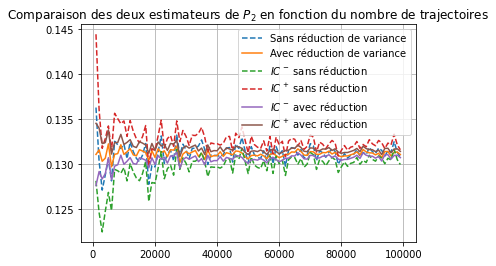

In [ ]:
#%%
n = 100000
array= range(1000,n,1000)
taille= len(array)
MC_prices_2 =np.zeros(taille)
CI_downs_2 = np.zeros(taille)
CI_ups_2 = np.zeros(taille)
MC_prices_a_2 =np.zeros(taille)
CI_downs_a_2 = np.zeros(taille)
CI_ups_a_2 = np.zeros(taille)
k = 0
for i in array :  
    [MC_price,MCa_price,error,errora]=Put_MC_VR_2(r,S0,sigma,T1,T2,K,i)

    MC_prices_2[k] = MC_price
    CI_ups_2 [k] = MC_price + error
    CI_downs_2 [k] = MC_price - error
    
    MC_prices_a_2[k] = MCa_price
    CI_ups_a_2 [k] = MCa_price + errora
    CI_downs_a_2 [k] = MCa_price - errora
    k+=1

plt.plot(array,MC_prices_2,'--',label ="Sans réduction de variance")
plt.plot(array,MC_prices_a_2,'-',label ="Avec réduction de variance")
plt.plot(array,CI_downs_2,'--',label="$IC^-$ sans réduction")
plt.plot(array,CI_ups_2,'--',label="$IC^+$ sans réduction")
plt.plot(array,CI_downs_a_2,'-',label="$IC^-$ avec réduction")
plt.plot(array,CI_ups_a_2,'-',label="$IC^+$ avec réduction")
plt.grid()
plt.title("Comparaison des deux estimateurs de $P_2$ en fonction du nombre de trajectoires")
plt.legend()

L'estimation est précise à partir d'un nombre de trajectoire égal à $20000$ sans pour autant saturer la puissance de calcul

Evolution de $P_2$, $P_{1}|_{T=T_{1}}$ et $P_{1}|_{T=T_{2}}$ en fonction de $S_0 \in [0.5, 2]$

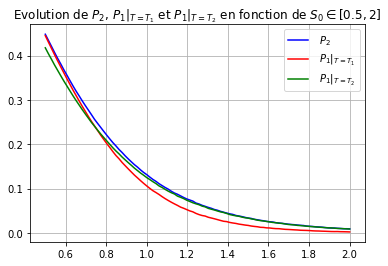

In [ ]:
#%%
n = 100
S00 = np.linspace(0.5, 2, n) 
Bermuda_2 = np.zeros(n)
Bermuda_1_T1 = np.zeros(n)
Bermuda_1_T2 = np.zeros(n)


Bermuda_2 = np.vectorize(Put_MC_VR_2)(r,S00,sigma,T1,T2,K,40000)[1]
Bermuda_1_T1 = np.vectorize(Put_MC_VR_1)(r,S00,sigma,T1,K,40000)[1]
Bermuda_1_T2  = np.vectorize(Put_MC_VR_1)(r,S00,sigma,T2,K,40000) [1]
    
plt.plot(S00,Bermuda_2,'-b', label =" $P_2$ ")
plt.plot(S00,Bermuda_1_T1,'-r', label = " $P_{1}|_{T=T_{1}}$ ")
plt.plot(S00,Bermuda_1_T2,'-g' , label = " $P_{1}|_{T=T_{2}}$ ")
plt.title("Evolution de $P_2$, $P_{1}|_{T=T_{1}}$ et $P_{1}|_{T=T_{2}}$ en fonction de $S_0 \in [0.5, 2]$")
plt.grid()
plt.legend()

Implémentation de SW

In [ ]:
#%% Switch Option
def SW(r,S0,sigma,T1,T2,K,Sample_size):
    
    [MC_price,MCa_price_2,error,errora] = Put_MC_VR_2(r,S0,sigma,T1,T2,K,Sample_size)
    [MC_price,MCa_price_1_T1,error,errora] = Put_MC_VR_1(r,S0,sigma,T1,K,Sample_size) 
    [MC_price,MCa_price_1_T2,error,errora] = Put_MC_VR_1(r,S0,sigma,T2,K,Sample_size) 
       
    return MCa_price_2 - np.maximum(MCa_price_1_T1, MCa_price_1_T2)


Evolution de SW en fonction de $S_0 \in [0.5, 2]$ avec $\sigma \in  \{0.1,0.2,0.4\}$




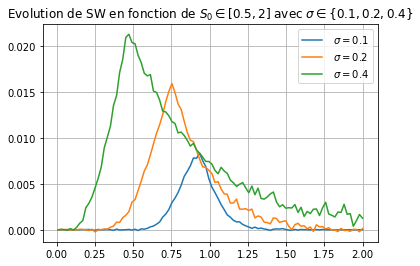

In [ ]:
#%%
n = 100
S00 = np.linspace(0.01, 2, n) 
r = 0.02 
T = 5 
K = 1
Sample_size = 100000
T1 = 3
T2 = 5
#sigma = 0.1 or 0.2 or 0.3
MC_SW_01_array = np.zeros(n)
MC_SW_02_array = np.zeros(n)
MC_SW_04_array = np.zeros(n)

for i in range(n) : 
    MC_SW_01_array[i] = SW(r,S00[i],0.1,T1,T2,K,Sample_size)
    MC_SW_02_array[i] = SW(r,S00[i],0.2,T1,T2,K,Sample_size)
    MC_SW_04_array[i] = SW(r,S00[i],0.4,T1,T2,K,Sample_size)
plt.grid()
plt.plot(S00,MC_SW_01_array, label =" $\sigma = 0.1$")
plt.plot(S00,MC_SW_02_array, label =" $\sigma = 0.2$")
plt.plot(S00,MC_SW_04_array, label =" $\sigma = 0.4$")
plt.title("Evolution de SW en fonction de $S_0 \in [0.5, 2]$ avec $\sigma \in  \{0.1,0.2,0.4\}$")
plt.legend()

Estimation des $w_k$ avec $k \in  \{0,1,2,3\}$ et de la variance empirique $\hat{\operatorname{Var}}(\varepsilon) $ 


In [ ]:
# Question 13
T1 = 1
T2 = 3
T3 = 5
Sample_size = 100000
S0 = 1
r = 0.02
sigma = 0.2
K =1
G1= Box_muller(Sample_size)
G2= Box_muller(Sample_size)
G3 = Box_muller(Sample_size)
WT_1 = np.sqrt(T1)*G1 
WT_2 = np.sqrt(T2-T1)*G2 + WT_1
WT_3 = np.sqrt(T2-T1)*G2 + WT_2

S1=S0*np.exp((r-sigma**2/2)*T1+sigma*WT_1)  
S2=S0*np.exp((r-sigma**2/2)*T2+sigma*WT_2)
S3=S0*np.exp((r-sigma**2/2)*T2+sigma*WT_3)

T = T3 - T2
p2 = np.zeros(Sample_size)
d1 = (1 / sigma*np.sqrt(T))*( np.log(S2/K) + (r*T + T*pow(sigma,2)/2 ))
d2 = d1 - sigma * np.sqrt(T)
true_price = K*np.exp(-r*T)*norm.cdf(-d2) -S2*norm.cdf(-d1)
p2 = np.maximum(np.maximum(K-S2,0),true_price)
z = np.polyfit(S1[0], p2[0], 3,full=True,cov=True)


Poly = np.poly1d(z[0])
eps = p2 - Poly(S1) 

print("la moyenne du résidu est :")
print(np.mean(eps))
print("la variance du résidu est :")
print(np.var(eps))
print(z)

la moyenne du résidu est :
-1.3244516594568268e-16
la variance du résidu est :
0.01452880906775033
(array([-0.2584705 ,  1.31747488, -2.26365633,  1.32411472]), array([1452.88090678]), 4, array([1.95248349, 0.42981888, 0.0551788 , 0.00438973]), 2.220446049250313e-11)


Utilisation du système donné en Question 13 , pour calculer les coefficients $w_k$ et calcul de P3

In [ ]:
# usage de la deuxième méthode : inversion du système
B = np.zeros(4)
B[0]=np.mean(p2)
B[1]=np.cov(p2,S1)[0,1]
B[2]=np.cov(p2,S1**2)[0,1]
B[3]=np.cov(p2,S1**3)[0,1]

A = np.zeros((4,4))
A[0,0]=1
for j in range(1,4):
  A[0,j]= np.mean(S1**j)
for i in range(1,4):
  for j in range(1,4):
    A[i,j]=np.cov(S1**i,S1**j)[0,1]

w = np.linalg.inv(A).dot(B)
G1 = Box_muller(Sample_size)
G2 = Box_muller(Sample_size)
G3 = Box_muller(Sample_size)
W_T1 = np.sqrt(T1)*G1
W_T2 = np.sqrt(T2-T1)*G2 + W_T1
W_T3 = np.sqrt(T3-T2)*G3 + np.sqrt(T2-T1)*G2 + np.sqrt(T1)*G1
S1 = S0*np.exp((r-sigma**2/2)*T1+sigma*np.sqrt(T1)*W_T1)
S2 = S0*np.exp((r-sigma**2/2)*T2+sigma*np.sqrt(T2)*W_T2)
S3 = S0*np.exp((r-sigma**2/2)*T3+sigma*np.sqrt(T3)*W_T3)
p2_t1 = np.exp(-r*(T2-T1))*np.sum([ w[i]*S1**i for i in range(4)],axis=0)
p3_t0 = np.mean(p2_t1)
print(p3_t0)

0.12784475626659036


Implémentation de $\overset{\sim}{K}$ et calcul de $P_3$ par :la méthode de Monte Carlo 



In [ ]:
def get_ktilde(x):
    return K-x-np.exp(-r*(T2-T1))*np.sum([ w[i]*x**i for i in range(4)],axis=0)
sol = root(lambda x : get_ktilde(x), 1)
k_tilde = sol.x
def f_kbar(x,sigma) : 
    d1= 1./(sigma*np.sqrt(T2-T1))*(np.log(x/K)+(r+sigma**2/2)*(T2-T1))
    d2= d1 - sigma*np.sqrt(T2-T1)
    y = K - x - K*np.exp(-r*(T2-T1))*norm.cdf(-d2)+x*norm.cdf(-d1)
    return y
def get_kbar(sigma):
    initial_guess = 0.10
    solution = root(lambda x : f_kbar(x,sigma), x0=initial_guess) 
    return solution.x
def f2(x) : 
    return np.maximum(K-x,0)
def P3(Sample_size,S0,sigma,k_tilde,T1,T2,T3):
    G1 = Box_muller(Sample_size)
    G2 = Box_muller(Sample_size)
    G3 = Box_muller(Sample_size)
    W_T1 = np.sqrt(T1)*G1
    W_T2 = np.sqrt(T2-T1)*G2 + W_T1
    W_T3 = np.sqrt(T3-T2)*G3 + np.sqrt(T2-T1)*G2 + np.sqrt(T1)*G1
    S1 = S0*np.exp((r-sigma**2/2)*T1+sigma*W_T1)
    S2 = S0*np.exp((r-sigma**2/2)*T2+sigma*W_T2)
    S3 = S0*np.exp((r-sigma**2/2)*T3+sigma*W_T3)
    k_bar=get_kbar(sigma)
    payoff=np.exp(-r*T3)*np.mean(f2(S3)*(S2>=k_bar)*(S1>=k_tilde))+np.exp(-r*T2)*np.mean(f2(S2)*(S2<k_bar)*(S1>=k_tilde))+np.exp(-r*T1)*np.mean(f2(S1)*(S1<k_tilde))
    return payoff



In [ ]:
def P2(Sample_size,S0,sigma,T1,T2):
    G1 = Box_muller(Sample_size)
    G2 = Box_muller(Sample_size)
    W_T1 = np.sqrt(T1)*G1
    W_T2 = np.sqrt(T2-T1)*G2 + W_T1
    S1 = S0*np.exp((r-sigma**2/2)*T1+sigma*W_T1)
    S2 = S0*np.exp((r-sigma**2/2)*T2+sigma*W_T2)
    k_bar=get_kbar(sigma)
    payoff=np.exp(-r*T2)*np.mean(f2(S2)*(S1>=k_bar)) + np.exp(-r*T1)*np.mean(f2(S1)*(S1<k_bar))
    return payoff

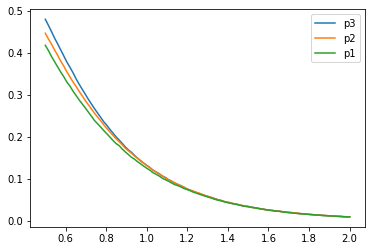

In [ ]:

P3(Sample_size,S0,sigma,k_tilde,T1,T2,T3)
x = np.linspace(0.5,2,100)
Sample_size = 100000
y = np.vectorize(P3)(Sample_size,x,sigma,k_tilde,1,3,5)
z = np.vectorize(P2)(Sample_size,x,sigma,3,5)
v = np.vectorize(Put_MC_1)(r,x,sigma,5,K,Sample_size)[0]
plt.plot(x,y,label='p3')
plt.plot(x,z,label='p2')
plt.plot(x,v,label='p1')


plt.legend()


Evaluation de la régression en utilisant la méthode de longstaff  & Schwartz pour bermuda à 2 exercices


In [ ]:
# Question 16
# On commence par caluler p2 ( = p2_t0 ) par la méthode de longstaff & Schwartz
T1 = 3
T2 = 5
# Definition des variables et generation des distributions S1 et S2
Sample_size = 500000
S0 = 1
K =1
sigma = 0.2
r = 0.02


G1= Box_muller(Sample_size)
G2= Box_muller(Sample_size)

WT_1 = np.sqrt(T1)*G1
    
WT_2 = np.sqrt(T2-T1)*G2 + WT_1
S1=S0*np.exp((r-sigma**2/2)*T1+sigma*WT_1)  
S2=S0*np.exp((r-sigma**2/2)*T2+sigma*WT_2)




# On cherche à estimer E(K-S2/S1)

Y = np.exp(-r*(T2-T1))* np.maximum(K-S2,0) # payoff de l'exercice à T= T2 , actualisé en T1 ( discounted cashflow)

z = np.polyfit(S1[0], Y[0], 3,full=True,cov=True)  # estimation des coefficients pour E(Y/S1)

Poly = np.poly1d(z[0])

G1= Box_muller(Sample_size)
G2= Box_muller(Sample_size)

WT_1 = np.sqrt(T1)*G1
    
WT_2 = np.sqrt(T2-T1)*G2 + WT_1
S1=S0*np.exp((r-sigma**2/2)*T1+sigma*WT_1)  
S2=S0*np.exp((r-sigma**2/2)*T2+sigma*WT_2)


continuation = Poly(S1)[0]


cashflow_S1 = np.maximum(K-S1,0)[0]
print("cashflow_S1")
print(cashflow_S1)

res = np.zeros(len(S1[0]))



for i in range(len(res)):
  if cashflow_S1[i]>continuation[i]:
    res[i] = np.exp(-r*T1)*cashflow_S1[i]
  else :
    res[i] = np.exp(-r*T2)*np.maximum(K-S2[0][i],0)

print("Longstaff price")
print(np.mean(res))


cashflow_S1
[0.         0.1071758  0.37467046 ... 0.13652601 0.         0.        ]
Longstaff price
0.13026906890543394
